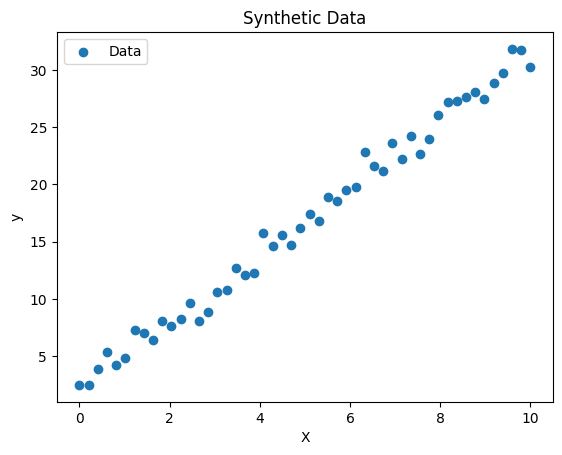

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
N = 50
X = np.linspace(0, 10, N)
true_beta0 = 2
true_beta1 = 3
epsilon = np.random.normal(0, 1, N)
y = true_beta0 + true_beta1 * X + epsilon

# Add a column of ones to X to account for the intercept term
X_design = np.vstack([np.ones(N), X]).T

# Plot the generated data
plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()


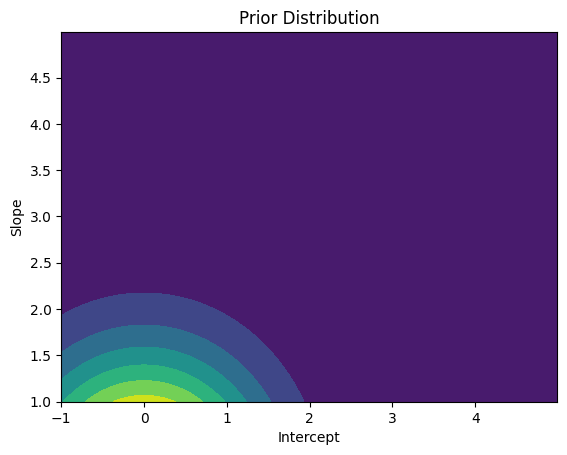

In [2]:
# Prior parameters
mu_0 = np.array([0, 0])  # Prior mean
Sigma_0 = np.eye(2)      # Prior covariance matrix
sigma_squared = 1        # Known variance of the noise

# Plot prior distribution
from scipy.stats import multivariate_normal

beta0, beta1 = np.mgrid[-1:5:.01, 1:5:.01]
pos = np.dstack((beta0, beta1))
prior = multivariate_normal(mu_0, Sigma_0)

plt.contourf(beta0, beta1, prior.pdf(pos))
plt.title('Prior Distribution')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.show()


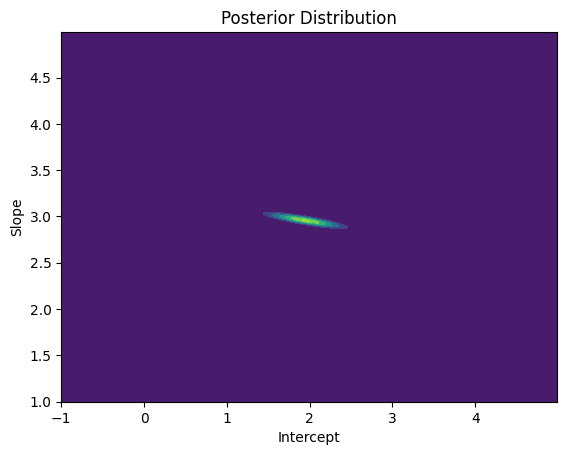

In [3]:
# Compute the posterior mean and covariance
Sigma_n = np.linalg.inv(np.linalg.inv(Sigma_0) + X_design.T @ X_design / sigma_squared)
mu_n = Sigma_n @ (np.linalg.inv(Sigma_0) @ mu_0 + X_design.T @ y / sigma_squared)

# Posterior distribution
posterior = multivariate_normal(mu_n, Sigma_n)

plt.contourf(beta0, beta1, posterior.pdf(pos))
plt.title('Posterior Distribution')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.show()


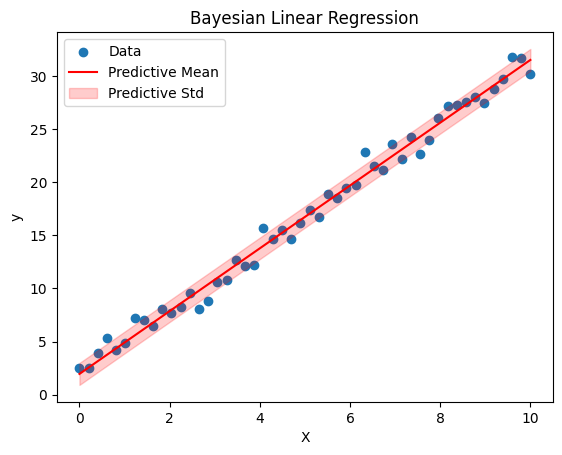

In [5]:
# New data points for prediction
X_new = np.linspace(0, 10, 100)
X_new_design = np.vstack([np.ones(X_new.shape[0]), X_new]).T

# Predictive mean and variance
y_pred_mean = X_new_design @ mu_n
y_pred_var = np.array([sigma_squared + X_new_design[i] @ Sigma_n @ X_new_design[i].T for i in range(X_new_design.shape[0])])
y_pred_std = np.sqrt(y_pred_var)

# Plot predictions with uncertainty
plt.scatter(X, y, label='Data')
plt.plot(X_new, y_pred_mean, 'r', label='Predictive Mean')
plt.fill_between(X_new, y_pred_mean - y_pred_std, y_pred_mean + y_pred_std, color='r', alpha=0.2, label='Predictive Std')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Bayesian Linear Regression')
plt.legend()
plt.show()
